In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:\\Users\\athar\\cicids2017_cleaned\\cicids2017_cleaned.csv")

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [6]:
df.shape

(2520751, 53)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520751 entries, 0 to 2520750
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Length of Fwd Packets  int64  
 4   Fwd Packet Length Max        int64  
 5   Fwd Packet Length Min        int64  
 6   Fwd Packet Length Mean       float64
 7   Fwd Packet Length Std        float64
 8   Bwd Packet Length Max        int64  
 9   Bwd Packet Length Min        int64  
 10  Bwd Packet Length Mean       float64
 11  Bwd Packet Length Std        float64
 12  Flow Bytes/s                 float64
 13  Flow Packets/s               float64
 14  Flow IAT Mean                float64
 15  Flow IAT Std                 float64
 16  Flow IAT Max                 int64  
 17  Flow IAT Min                 int64  
 18  Fwd IAT Total                int64  
 19  

In [8]:
df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Length of Fwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd Header Length              0
Bwd Header Length              0
Fwd Packet

Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64


C:\Users\athar\AppData\Local\Temp\ipykernel_28280\956607838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


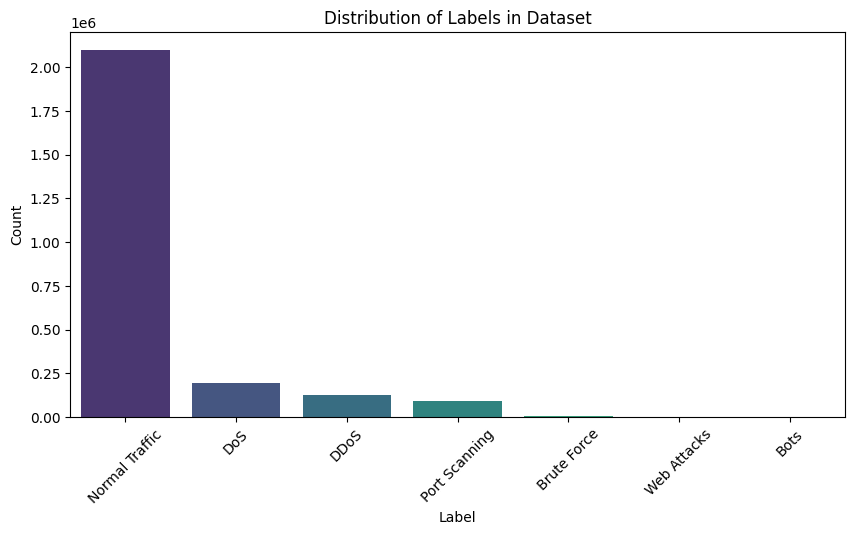

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique labels
label_counts = df['Attack Type'].value_counts()

print(label_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

In [11]:
X = df.drop(columns=['Attack Type'], axis=1)
y=df['Attack Type']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

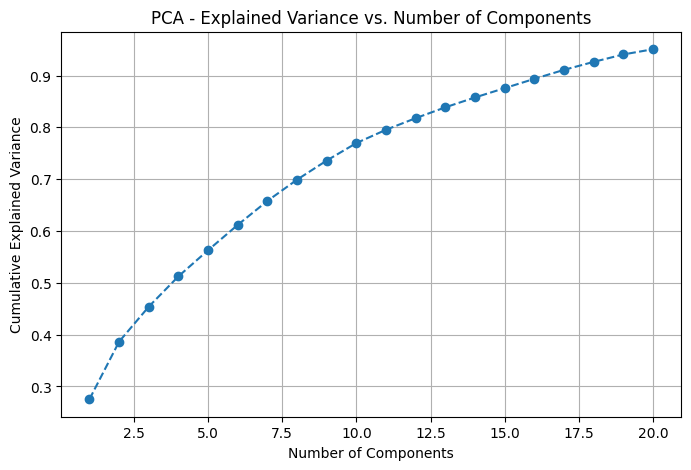

New shape of X after PCA: (2520751, 20)


In [13]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X = pca.fit_transform(X_scaled)  # Overwrite X with transformed data

explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs. Number of Components')
plt.grid()
plt.show()


# Print new shape of X
print(f"New shape of X after PCA: {X.shape}")


In [14]:
# Convert PCA-transformed features back to DataFrame
pca_columns = [f'PC{i+1}' for i in range(X.shape[1])]  # Naming PCA components
df_pca = pd.DataFrame(X, columns=pca_columns)

# Add back the target variable
df_pca['Attack Type'] = y.reset_index(drop=True)  # Ensure index alignment

# Print the new DataFrame shape
print(f"New DataFrame shape: {df_pca.shape}")

# Display the first few rows
df_pca.head()


New DataFrame shape: (2520751, 21)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Attack Type
0,-1.113271,-0.933184,0.825754,-0.587394,-0.893930,-0.155269,1.153935,-1.155150,-0.062188,0.039288,...,-0.241714,-0.065796,-0.195373,-0.601931,0.022849,0.780358,0.868858,-0.007819,-0.018398,Normal Traffic
1,-1.112210,-0.932636,0.826316,-0.587413,-0.894536,-0.155346,1.153584,-1.155830,-0.062206,0.039663,...,-0.242417,-0.065742,-0.195148,-0.601316,0.022826,0.779133,0.868210,-0.007675,-0.018384,Normal Traffic
2,-1.880024,0.317059,-0.276107,0.870247,-0.058367,-0.386229,-0.144186,-0.242548,-0.001499,-0.998175,...,-0.008183,-0.023457,-0.562197,-0.499390,0.006449,-0.261522,-0.084626,0.579139,-0.257925,Normal Traffic
3,-1.109544,-0.935243,0.831519,-0.588471,-0.888757,-0.155353,1.154332,-1.155539,-0.062350,0.039184,...,-0.241843,-0.071395,-0.195591,-0.601252,0.022778,0.779398,0.869374,-0.007499,-0.018470,Normal Traffic
4,-1.985633,0.344671,-0.099452,1.740201,0.124206,-0.299433,-0.016038,-0.076281,0.000776,-1.108075,...,0.342013,-0.040125,-0.173742,-0.342872,0.000747,-0.657947,-0.147667,0.797376,0.289343,Normal Traffic


In [ ]:
df_pca.shape


(2520751, 21)

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Prepare dataset
X = df_pca.drop(columns=['Attack Type']).values  
y = df_pca['Attack Type'].values  

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape X for CNN (Ensure it's 3D: (samples, features, 1))
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build improved CNN + BiLSTM model
model = Sequential([
    # CNN Feature Extractor
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # BiLSTM Layers
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))),
    Dropout(0.3),
    Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))),

    # Dense Layers
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    
    # Output Layer
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Since y is encoded as integers
    metrics=['accuracy']
)

# Callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\athar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
14357/31510 ━━━━━━━━━━━━━━━━━━━━ 3:08 11ms/step - accuracy: 0.9445 - loss: 0.4191

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0
